IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import classification_report, accuracy_score

IMPORTING THE DATASET

In [2]:
file_path = 'new_record.csv'
dataset = pd.read_csv(file_path)

dataset.head()

,Admission Test Score,Age,High School Percentage,Gender,City,Admission Status
0,60.000000,23,89.200375,0,Rawalpindi,Rejected
1,60.018657,20,84.760672,1,Karachi,Admitted
2,60.037313,21,81.551361,0,Karachi,Rejected
3,60.055970,23,85.552365,1,Peshawar,Admitted
4,60.074627,19,88.552708,1,Lahore,Admitted


In [3]:
label_encoder = LabelEncoder()
dataset['City'] = label_encoder.fit_transform(dataset['City'])
dataset['Admission Status'] = label_encoder.fit_transform(dataset['Admission Status'])

Douplecheck of dataset

In [4]:
dataset.head()

,Admission Test Score,Age,High School Percentage,Gender,City,Admission Status
0,60.000000,23,89.200375,0,6,1
1,60.018657,20,84.760672,1,1,0
2,60.037313,21,81.551361,0,1,1
3,60.055970,23,85.552365,1,4,0
4,60.074627,19,88.552708,1,2,0


In [5]:
X = dataset[['Age', 'High School Percentage', 'Gender', 'City', 'Admission Status']]
y = dataset['Admission Test Score']

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling to the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [7]:
X.shape

(2145, 5)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LinearRegression model

In [9]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = linear_reg.predict(X_test)
linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_r2 = r2_score(y_test, y_pred)
linear_reg_mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {linear_reg_mse:.2f}")
print(f"Mean Absolute Error: {linear_reg_mae:.2f}")
print(f"Linear Regression R^2: {linear_reg_r2:.2f}")


Mean Squared Error: 61.57
Mean Absolute Error: 6.50
Linear Regression R^2: 0.55


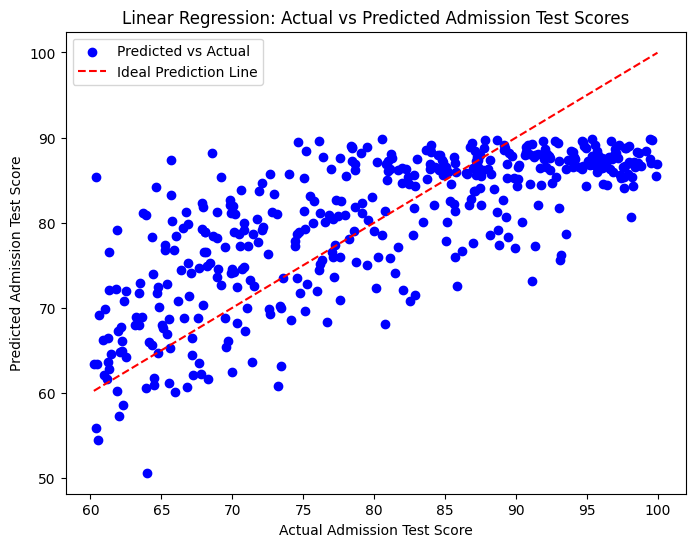

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction Line')

plt.title('Linear Regression: Actual vs Predicted Admission Test Scores')
plt.xlabel('Actual Admission Test Score')
plt.ylabel('Predicted Admission Test Score')

plt.legend()
plt.show()


# KNN

In [12]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [13]:
knn_reg_pred = knn_reg.predict(X_test)
knn_reg_mse = mean_squared_error(y_test, knn_reg_pred)
knn_reg_r2 = r2_score(y_test, knn_reg_pred)
knn_reg_mae = mean_absolute_error(y_test, knn_reg_pred)

print(f"Mean Squared Error: {knn_reg_mse:.2f}")
print(f"Mean Absolute Error: {knn_reg_mae:.2f}")
print(f"KNN Regression R^2: {knn_reg_r2:.2f}")

Mean Squared Error: 72.20
Mean Absolute Error: 6.83
KNN Regression R^2: 0.47


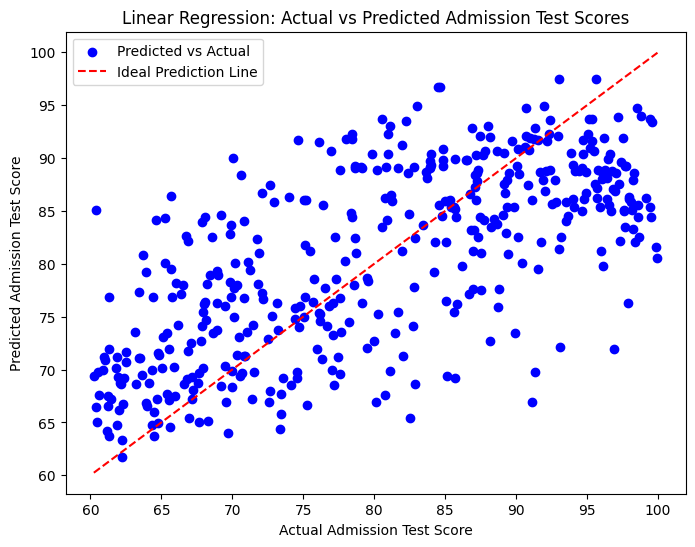

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_reg_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction Line')

plt.title('Linear Regression: Actual vs Predicted Admission Test Scores')
plt.xlabel('Actual Admission Test Score')
plt.ylabel('Predicted Admission Test Score')

plt.legend()
plt.show()